In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [3]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [4]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

data_numerical.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0


In [5]:
data_numerical.shape

(1460, 24)

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline(
    [('prepro', StandardScaler()), ('regressor', Ridge(alpha=0))]
)

cv_results = cross_validate(
    model,
    data_numerical,
    target,
    cv=10,
    return_estimator=True,
    n_jobs=-1,
)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.35911e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

In [8]:
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-2150.565785,493.494153,4637.694639,-4.969873e+18,-1.770471e+18,-4.778107e+18,-4.361649e+18,-1.204271e+19,-1.361257e+19,-1.550650e+18,...,2126.014179,13060.388106,-9192.390861,3292.210973,632.900594,-6812.089922,-686.497923,653.470970,-5327.185780,-1049.227055
max,2684.949822,2128.420676,9086.583571,4.551274e+18,1.575327e+18,4.355752e+18,4.771449e+18,2.609555e+18,3.011876e+18,3.446615e+17,...,4069.517486,23276.774437,3949.302538,5790.611069,3128.998021,-1818.336174,1697.503301,2871.698171,567.966515,3164.376581


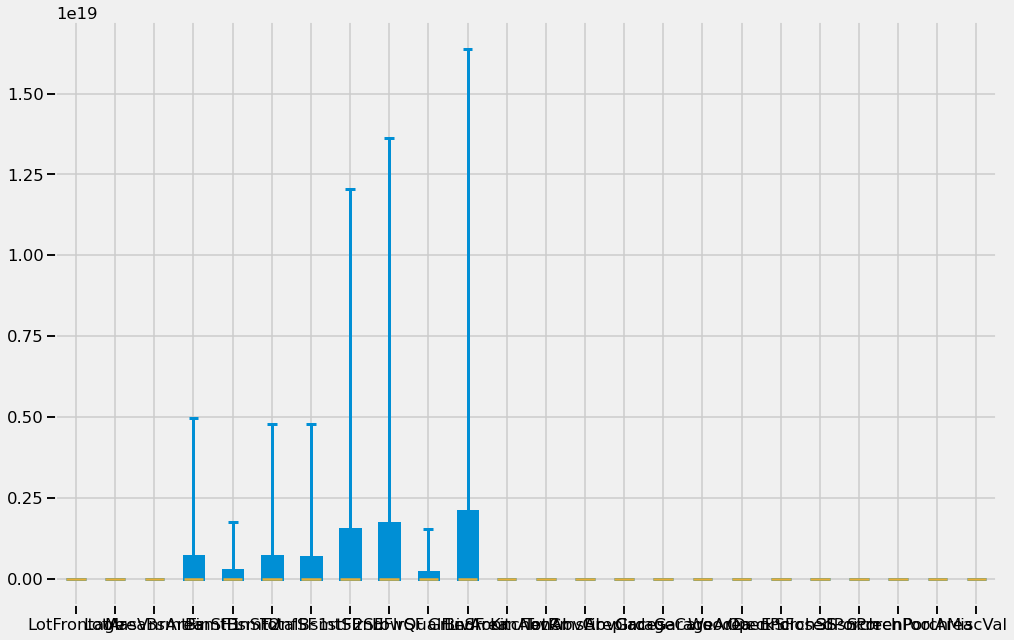

In [9]:
sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(ax=ax)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 [Text(1, 0, 'LotFrontage'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'MasVnrArea'),
  Text(4, 0, 'BsmtFinSF1'),
  Text(5, 0, 'BsmtFinSF2'),
  Text(6, 0, 'BsmtUnfSF'),
  Text(7, 0, 'TotalBsmtSF'),
  Text(8, 0, '1stFlrSF'),
  Text(9, 0, '2ndFlrSF'),
  Text(10, 0, 'LowQualFinSF'),
  Text(11, 0, 'GrLivArea'),
  Text(12, 0, 'BedroomAbvGr'),
  Text(13, 0, 'KitchenAbvGr'),
  Text(14, 0, 'TotRmsAbvGrd'),
  Text(15, 0, 'Fireplaces'),
  Text(16, 0, 'GarageCars'),
  Text(17, 0, 'GarageArea'),
  Text(18, 0, 'WoodDeckSF'),
  Text(19, 0, 'OpenPorchSF'),
  Text(20, 0, 'EnclosedPorch'),
  Text(21, 0, '3SsnPorch'),
  Text(22, 0, 'ScreenPorch'),
  Text(23, 0, 'PoolArea'),
  Text(24, 0, 'MiscVal')])

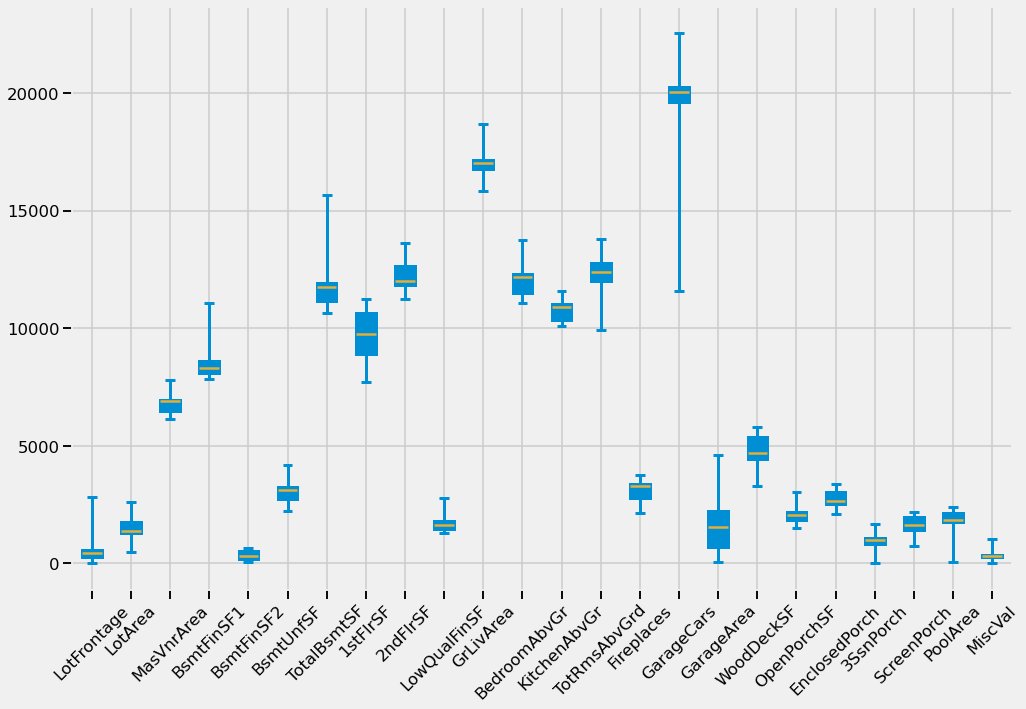

In [10]:
model = Pipeline(
    [('prepro', StandardScaler()), ('regressor', Ridge(alpha=1.0))]
)

cv_results = cross_validate(
    model,
    data_numerical,
    target,
    cv=10,
    return_estimator=True,
    n_jobs=-1,
)

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(ax=ax)
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 [Text(1, 0, 'LotFrontage'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'MasVnrArea'),
  Text(4, 0, 'BsmtFinSF1'),
  Text(5, 0, 'BsmtFinSF2'),
  Text(6, 0, 'BsmtUnfSF'),
  Text(7, 0, 'TotalBsmtSF'),
  Text(8, 0, '1stFlrSF'),
  Text(9, 0, '2ndFlrSF'),
  Text(10, 0, 'LowQualFinSF'),
  Text(11, 0, 'GrLivArea'),
  Text(12, 0, 'BedroomAbvGr'),
  Text(13, 0, 'KitchenAbvGr'),
  Text(14, 0, 'TotRmsAbvGrd'),
  Text(15, 0, 'Fireplaces'),
  Text(16, 0, 'GarageCars'),
  Text(17, 0, 'GarageArea'),
  Text(18, 0, 'WoodDeckSF'),
  Text(19, 0, 'OpenPorchSF'),
  Text(20, 0, 'EnclosedPorch'),
  Text(21, 0, '3SsnPorch'),
  Text(22, 0, 'ScreenPorch'),
  Text(23, 0, 'PoolArea'),
  Text(24, 0, 'MiscVal')])

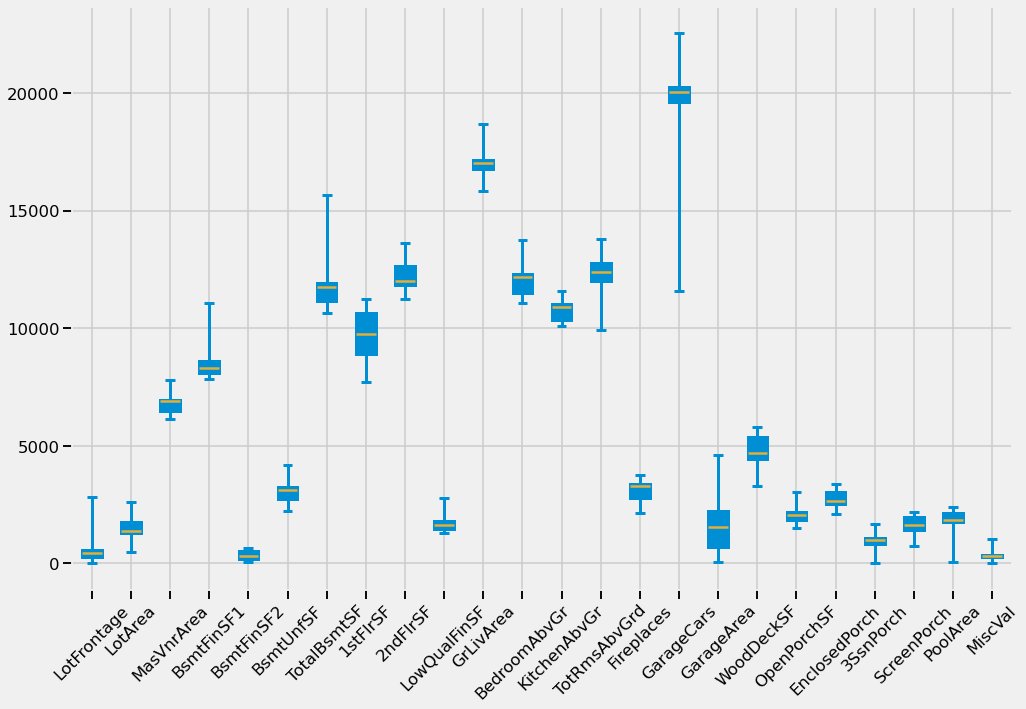

In [11]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(ax=ax)
plt.xticks(rotation=45)

In [12]:
column_to_drop = "GarageArea"
data_numerical = data_numerical.drop(columns=column_to_drop)

cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs.describe()["GarageCars"]

count       10.000000
mean     18837.624639
std       1305.139394
min      15404.159197
25%      18650.548120
50%      19223.437732
75%      19480.972031
max      19963.351138
Name: GarageCars, dtype: float64

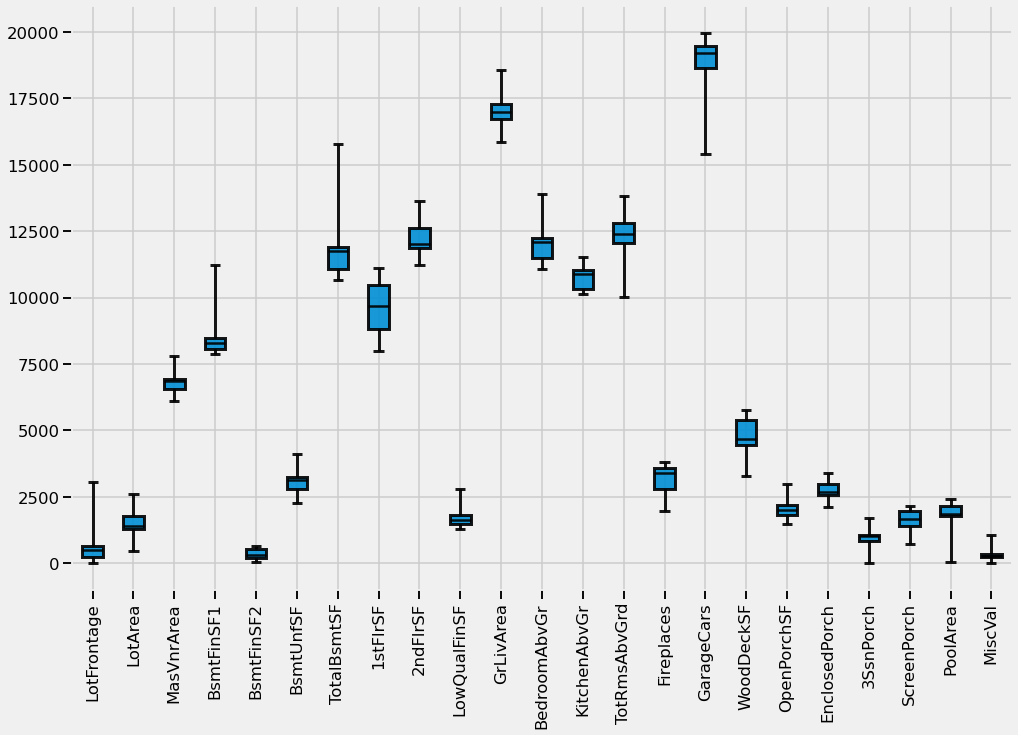

In [13]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

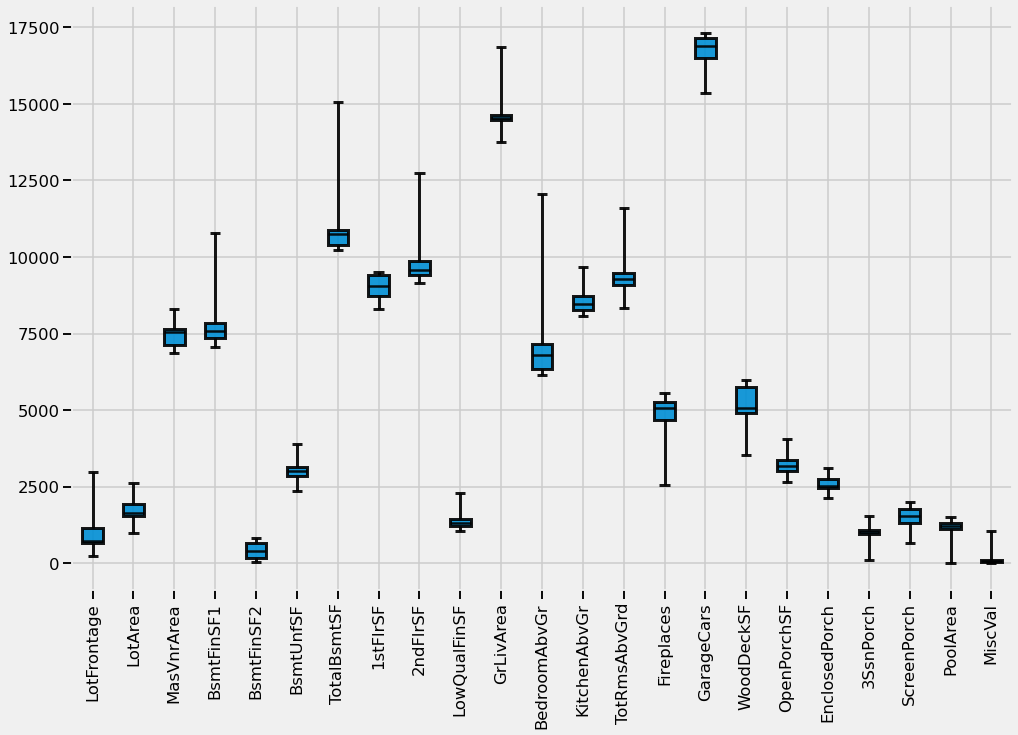

In [14]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-3, 3, num=101)

model = Pipeline(
    [('prepro', StandardScaler()), ('regressor', RidgeCV(alphas=alphas))]
)
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


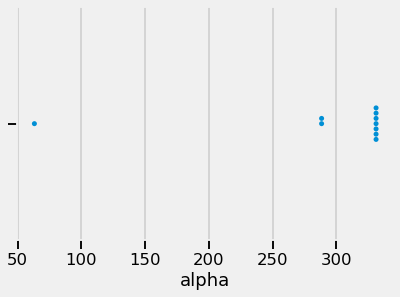

In [15]:
alpha = [estimator[-1].alpha_ for estimator in cv_results["estimator"]]
alpha = pd.Series(alpha, name="alpha")
ax = sns.swarmplot(alpha)

In [16]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [17]:
target.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

for model in [DummyClassifier,LogisticRegression]:
    cls = make_pipeline(StandardScaler(), model())
    cv_results = cross_validate(
    cls, data, target, cv=10, return_estimator=True
    )
    s = cv_results["test_score"]
#     cv_results["test_score"].mean()
    print(f"{model.__name__:22}: "
          f"{s.mean():.3f} STD: {s.std():.2f}"
         )




DummyClassifier       : 0.761 STD: 0.00
LogisticRegression    : 0.800 STD: 0.00


<AxesSubplot:>

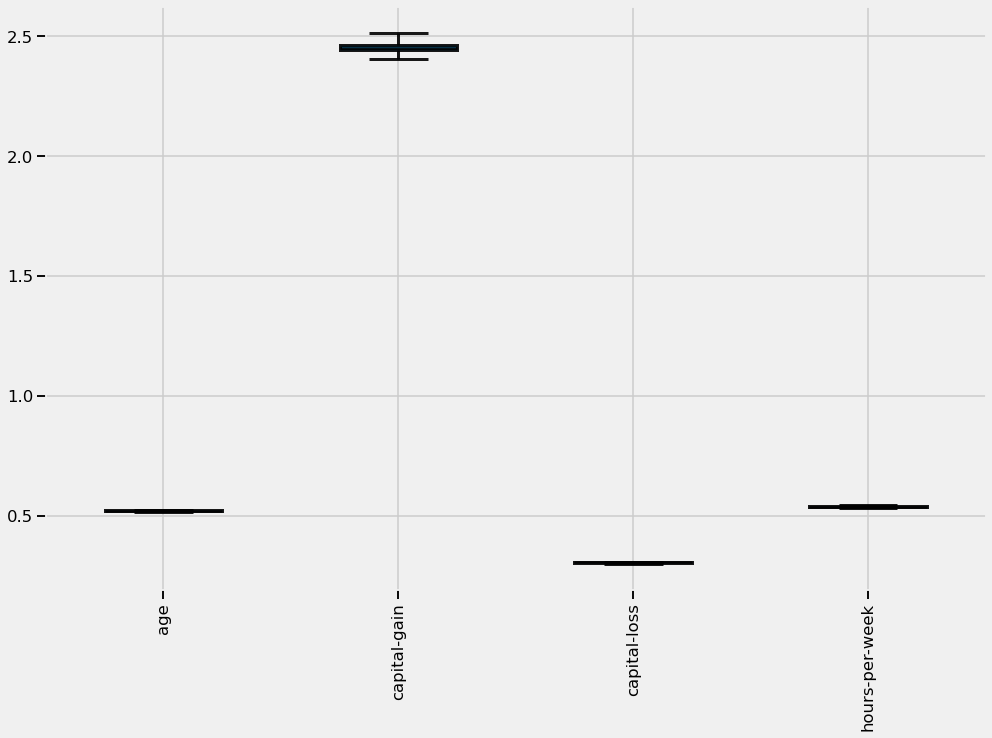

In [19]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

In [20]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [21]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    (StandardScaler(), numerical_columns),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
cv_results["test_score"].mean()

0.8515212248630878

In [22]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names


['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

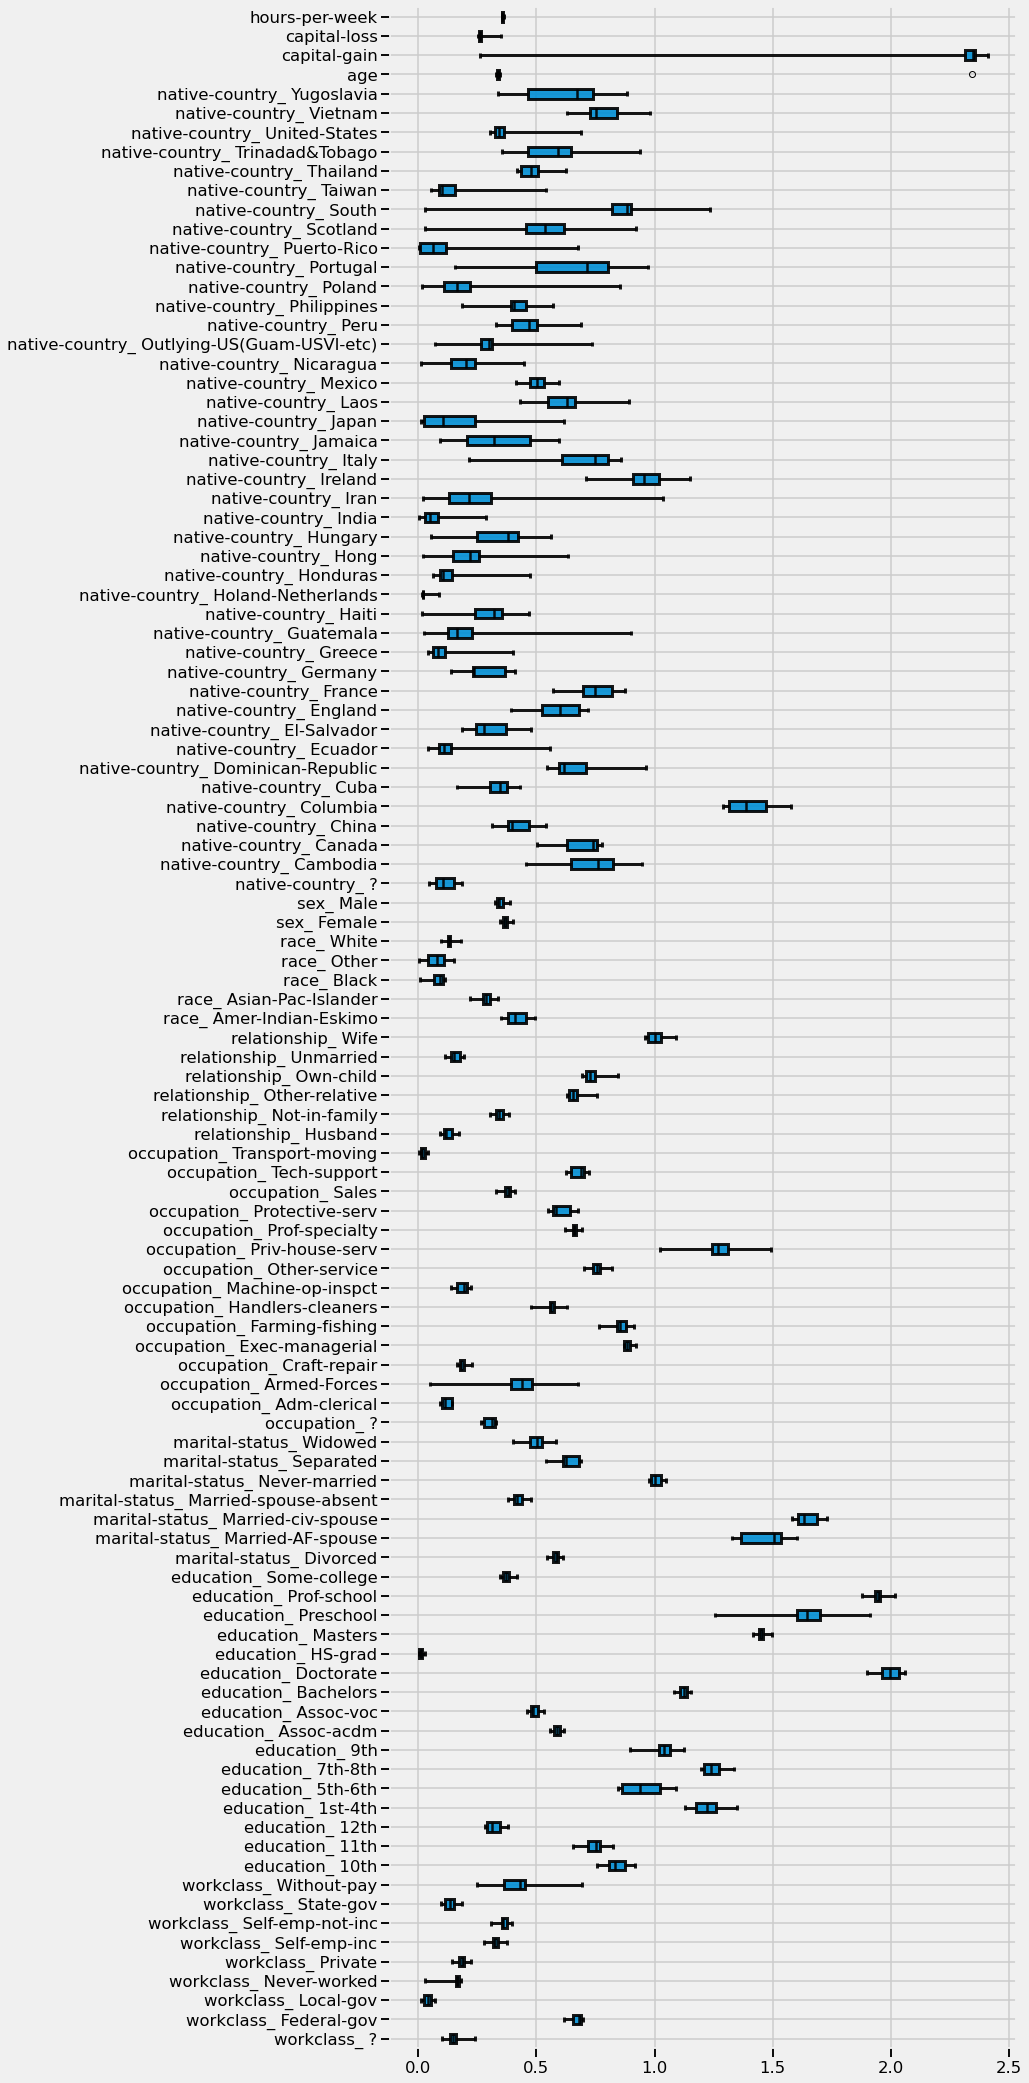

In [23]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

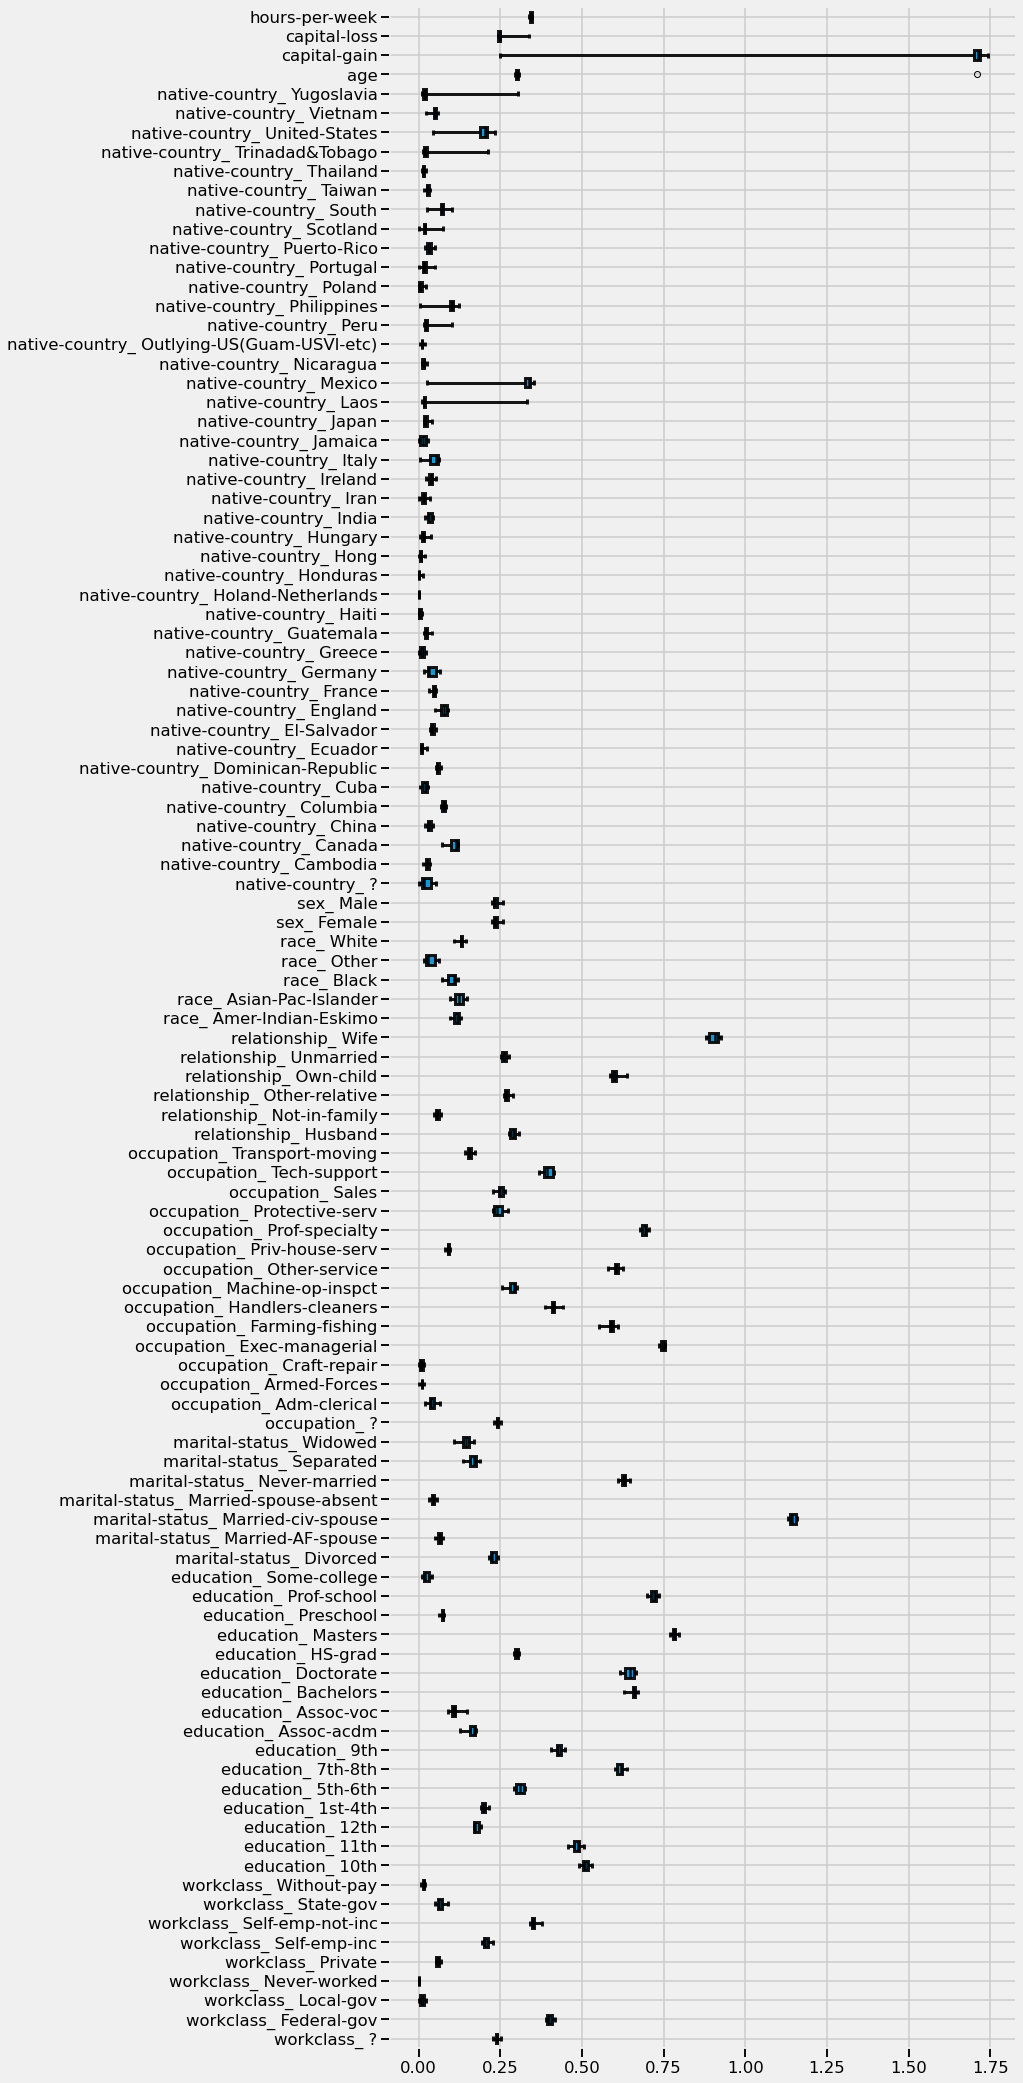

In [24]:
model = make_pipeline(
    preprocessor, LogisticRegression(C=0.01, max_iter=5000)
)
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)